In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
from tensorflow import keras
from keras.layers import Dense, GlobalMaxPooling2D, GlobalAveragePooling2D, Conv2D, BatchNormalization, Activation, Reshape
from keras.models import Sequential
from sklearn.preprocessing import scale
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2

In [2]:
(X_train,y_train), (X_test, y_test)= mnist.load_data()
x=np.concatenate((X_train,X_test))
y=np.concatenate((y_train, y_test))

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [4]:
print(x_train.shape, x_train.dtype)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(56000, 28, 28) uint8
(56000,)
(14000, 28, 28)
(14000,)


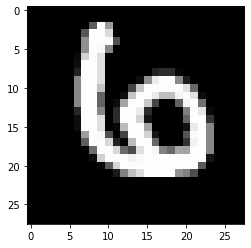

In [5]:
plt.imshow(x_train[90],cmap='gray')
plt.show()

In [6]:
X_train=x_train.reshape(len(x_train),28,28,1)
X_test=x_test.reshape(len(x_test),28,28,1)
print(X_train.shape, X_test.shape)

(56000, 28, 28, 1) (14000, 28, 28, 1)


In [7]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [8]:
X_train /= 255 -0.5
X_test /= 255 -0.5

In [9]:
filter_size1=3
filter_size2=5
pool_size1=2

In [26]:
model=Sequential()
model.add(Conv2D(256,filter_size1,strides=(1,1),input_shape=(None,None,1), data_format='channels_last'))
model.add(Conv2D(128,filter_size2,input_shape=(None,None,256), data_format='channels_last'))
model.add(Conv2D(64,filter_size2,input_shape=(None,None,128), data_format='channels_last'))
model.add(Conv2D(32,filter_size2,input_shape=(None,None,64), data_format='channels_last'))
model.add(Conv2D(16,filter_size2,input_shape=(None,None,32), data_format='channels_last'))
#model.add(Conv2D(33,filter_size2,input_shape=(None,None,50), data_format='channels_last'))
#model.add(Conv2D(101,filter_size2,input_shape=(None,None,1), data_format='channels_last'))
#model.add(Dense(200, activation='relu'))
#model.add(Dense(133, activation='relu'))
#model.add(Dense(88, activation='relu'))
#model.add(GlobalMaxPooling2D(data_format='channels_last'))
#model.add(BatchNormalization())
model.add(Conv2D(10,filter_size2, input_shape=(None,None,16), data_format='channels_last'))
model.add(GlobalMaxPooling2D())
model.add(Activation(activation='softmax'))
#model.add(Dense(10,activation='softmax'))

In [27]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
model.fit(X_train, to_categorical(y_train), epochs=5, batch_size=40)

Epoch 1/5
1400/1400 [==============================] - 36s 26ms/step - loss: 0.3754 - accuracy: 0.8909
Epoch 2/5
1400/1400 [==============================] - 36s 26ms/step - loss: 0.3417 - accuracy: 0.9006
Epoch 3/5
1400/1400 [==============================] - 37s 27ms/step - loss: 0.3183 - accuracy: 0.9093
Epoch 4/5
1400/1400 [==============================] - 37s 27ms/step - loss: 0.3071 - accuracy: 0.9126
Epoch 5/5
1400/1400 [==============================] - 38s 27ms/step - loss: 0.2963 - accuracy: 0.9153


In [31]:
scores=model.evaluate(X_test, to_categorical(y_test))
print('\n%s: %.2f%%'%(model.metrics_names[1], scores[1]*100))

438/438 [==============================] - 4s 8ms/step - loss: 0.2635 - accuracy: 0.9229

accuracy: 92.29%


In [ ]:
model.save('D:\\Personal\\Practice\\ML\\Notebook')

In [10]:
model=keras.models.load_model('D:\\Personal\\Practice\\ML\\Notebook')

In [81]:
def predict_image(image):
    #converting into gray image
    grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
    print('The image:')
    plt.show(plt.imshow(grey, cmap='gray'))
    #inverting colours
    grey=cv2.bitwise_not(grey,mask=None)
    ret, resized_digit = cv2.threshold(grey.copy(), 130, 255, cv2.THRESH_BINARY)
    #Dilating handwritten digit
    kernel = np.ones((1,1),np.uint8)
    resized_digit=cv2.dilate(resized_digit,kernel, iterations=4)
    #Resizing the image
    resized_digit = cv2.resize(resized_digit, (60,60))
    #Normalization for each pixel
    resized_digit=resized_digit.astype('float32')
    resized_digit /= 255 -0.5
    print('The prediction-ready image:')
    plt.show(plt.imshow(resized_digit, cmap='gray'))
    #predicting the digit
    prediction = model.predict(resized_digit.reshape(1,resized_digit.shape[0],resized_digit.shape[1],1))
    for i in range(len(prediction[0])):
        if max(prediction[0])<0.4:
            digit=i
            pred_list=prediction[0].tolist()
            mx=max(pred_list[0],pred_list[1])
            secondmax=min(pred_list[0],pred_list[1])
            n=len(pred_list)
            for j in range(2,n):
                if pred_list[j]>mx:
                    secondmax=mx
                    mx=pred_list[j]
                elif pred_list[j]>secondmax and mx!=pred_list[j]:
                    next_digit=j
            #print(pred_list)
            return print('The digit is:',digit,'or',next_digit)
        elif prediction[0][i]==max(prediction[0]):
            digit=i  
            print(prediction[0])
            return print('The digit is:',digit)     

The threshold and size of image must be varied according to the requirement, as it might vary from person to person.

In [84]:
image = cv2.imread('D:\Personal\Practice\ML\Digit_8.jpg')

The image:


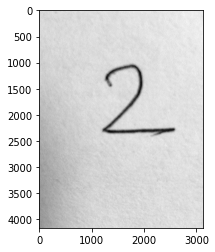

The prediction-ready image:


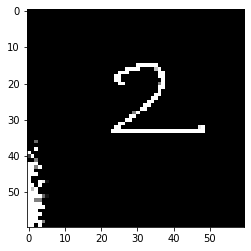

[0.00297097 0.05082562 0.4726511  0.08421095 0.0044158  0.0223268
 0.02354751 0.0162949  0.19731334 0.125443  ]
The digit is: 2


In [85]:
predict_image(image)